In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [4]:
plabels = np.array(["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"])

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

gamma_permutations = [-0.05, -0.02, 0.02, 0.05]

beta_permutations = [0.2, 0.1, -0.1, -0.2]

### first the gamma permutations

In [5]:
gamma1 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_B/gamma/mock_1/chain.h5", Nstack=500, Nburn=500, Nthin=25)

gamma2 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_B/gamma/mock_2/chain.h5", Nstack=500, Nburn=500, Nthin=25)

gamma3 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_B/gamma/mock_3/chain.h5", Nstack=500, Nburn=500, Nthin=25)

gamma4 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_B/gamma/mock_4/chain.h5", Nstack=500, Nburn=500, Nthin=25)

gamma5 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_B/gamma/mock_5/chain.h5", Nstack=500, Nburn=500, Nthin=25)

In [6]:
save_file = "../../../paper_1/figures/gamma_perm.pdf"

model_color = "olivedrab"

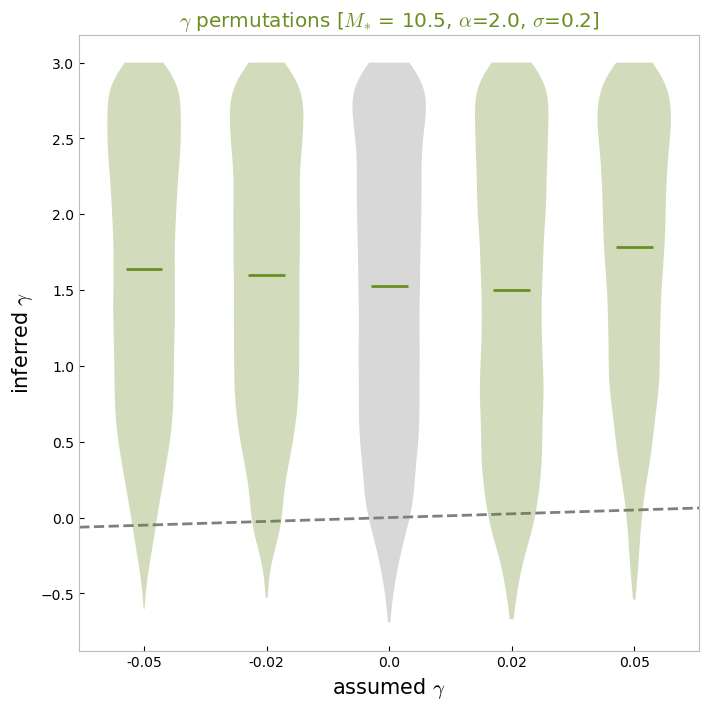

In [116]:
gamma_permutations = [-0.05, -0.025, 0.0, 0.025, 0.05]

data = [gamma1.thin[:,3], gamma2.thin[:,3],  gamma5.thin[:,3], gamma3.thin[:,3], gamma4.thin[:,3]]

# Create a violin plot
plt.figure(figsize=(8,8))

plt.title("$\\gamma$ permutations [$M_{*}$ = 10.5, $\\alpha$=2.0, $\\sigma$=0.2]", color=model_color)
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=gamma_permutations, widths=0.015, showextrema=False)

for i, violin in enumerate(violins['bodies']):
    if i == 2:
        violin.set_facecolor("grey")
    else:
        violin.set_facecolor(model_color)

violins['cmedians'].set_color(model_color)


plt.xticks(gamma_permutations, ['-0.05', '-0.02', '0.0', '0.02', '0.05'])
plt.ylabel('inferred $\\gamma$', fontsize=15)
plt.xlabel("assumed $\\gamma$", fontsize=15)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False, zorder=0, alpha=0.5)

plt.savefig(save_file, bbox_inches='tight')
plt.show()


In [8]:
plabels[[1,2,3]]
Ndim = 3

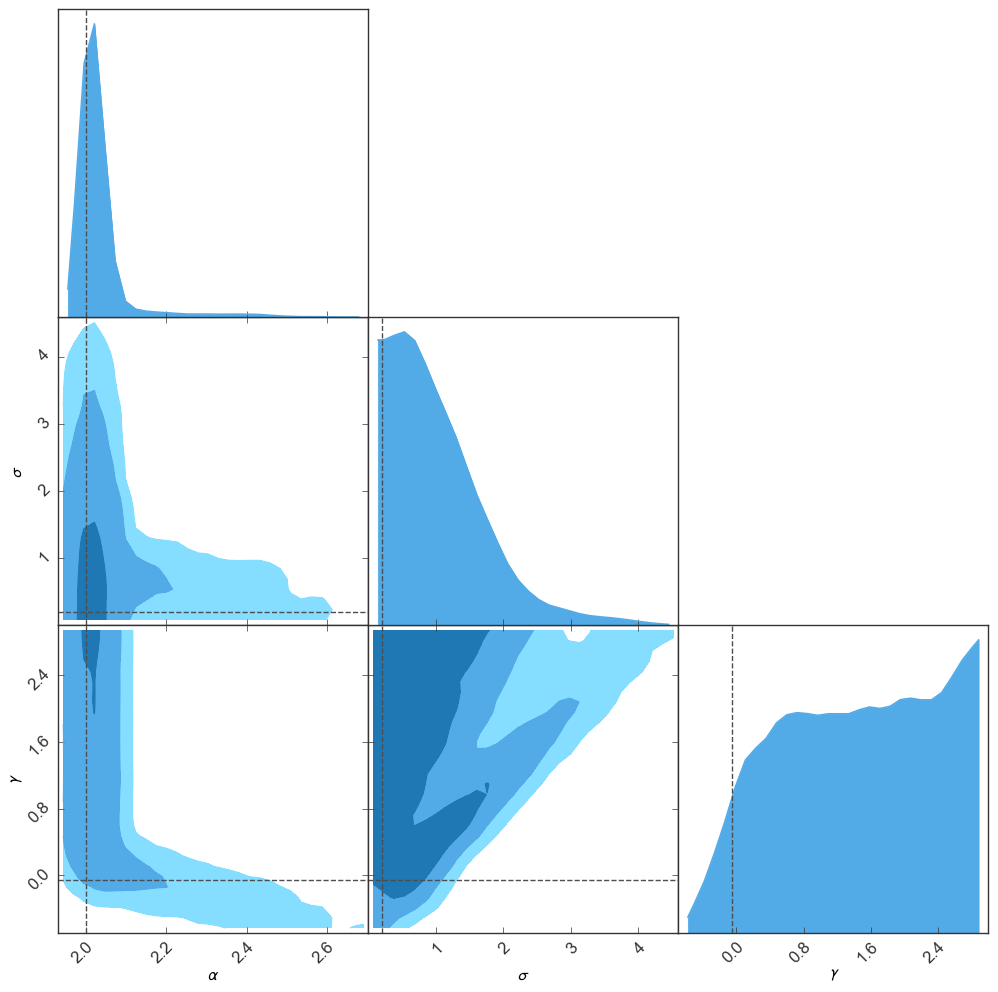

In [9]:
GTC = pygtc.plotGTC(chains=gamma5.thin[:,[1,2,3]],
                paramNames = plabels[[1,2,3]],
                truths = [2.0, 0.2, -0.05],
                nContourLevels=3,
                figureSize=int(8*Ndim/2),
                smoothingKernel=1,
                filledPlots=True,
                customTickFont={'family':'Arial', 'size':12},
                customLegendFont={'family':'Arial', 'size':15},
                customLabelFont={'family':'Arial', 'size':12})

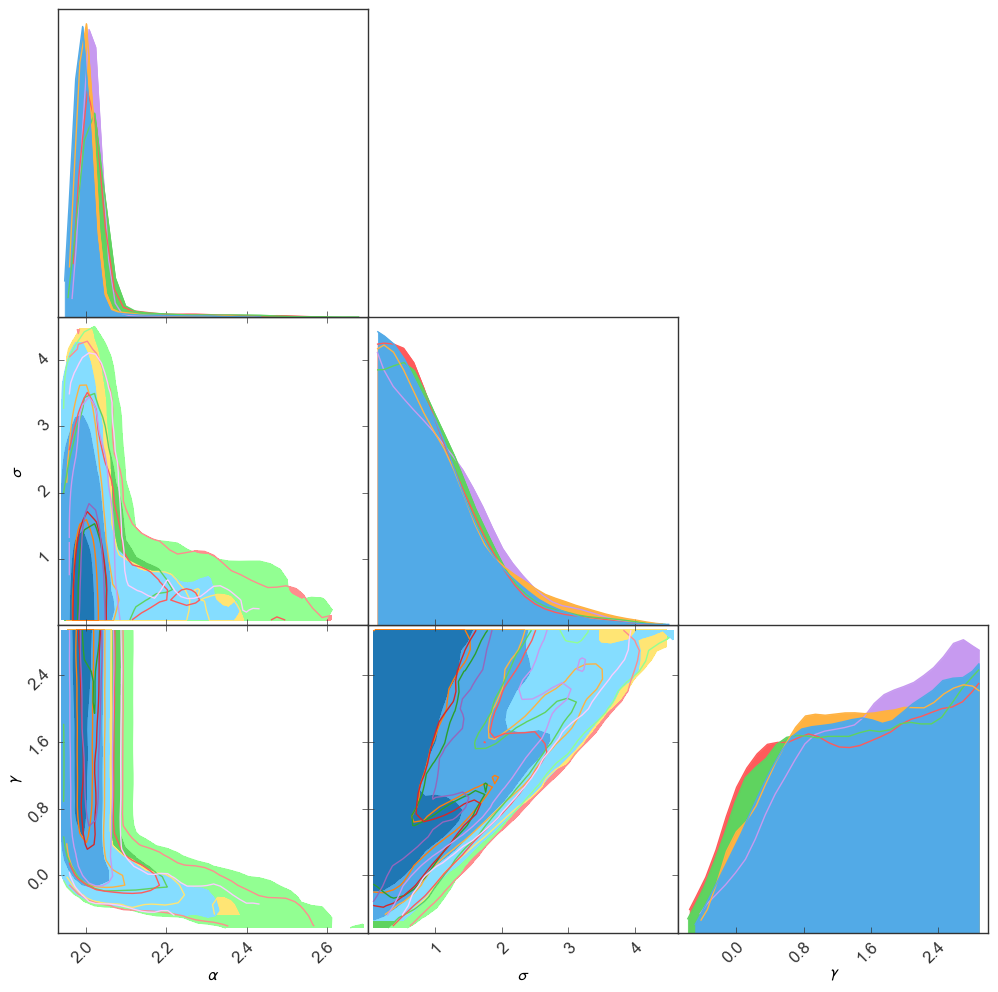

In [120]:
data = [gamma1.thin[:,[1,2,3]], gamma2.thin[:,[1,2,3]],  gamma5.thin[:,[1,2,3]], gamma3.thin[:,[1,2,3]], gamma4.thin[:,[1,2,3]]]

GTC = pygtc.plotGTC(chains=data,
                paramNames = plabels[[1,2,3]],
                nContourLevels=3,
                figureSize=int(8*Ndim/2),
                smoothingKernel=1,
                filledPlots=True,
                customTickFont={'family':'Arial', 'size':12},
                customLegendFont={'family':'Arial', 'size':15},
                customLabelFont={'family':'Arial', 'size':12})

In [121]:
gamma3 = jsm_mcmc.single_chain("../../mcmc/paper_runs/model_B/gamma/mock_3/chain.h5", Nstack=1, Nburn=200, Nthin=25)

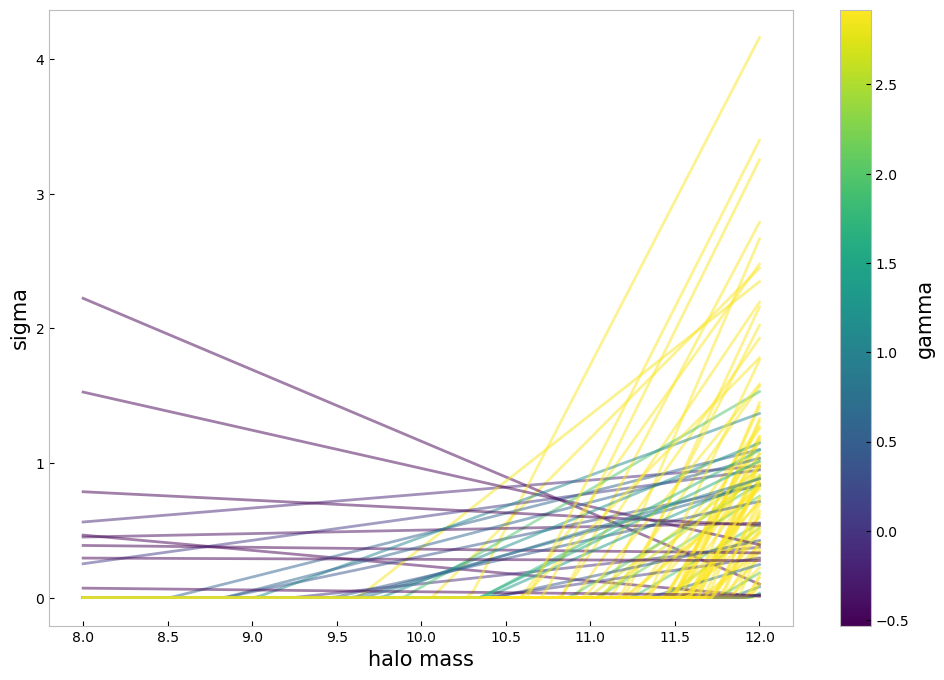

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

halo_masses = np.linspace(8, 12, 100)

plt.figure(figsize=(12,8))
# Assuming gamma3.end is a list of arrays
for theta in gamma3.end:
    sigma = theta[2] + theta[3] * (halo_masses - 12)
    sigma[sigma < 0] = 0.0
    plt.plot(halo_masses, sigma, alpha=0.5, color=plt.cm.viridis(theta[3]))

plt.ylabel("sigma")
plt.xlabel("halo mass")

# Creating a ScalarMappable
norm = Normalize(vmin=min(theta[3] for theta in gamma3.end), vmax=max(theta[3] for theta in gamma3.end))
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])

# Adding colorbar
cbar = plt.colorbar(sm, label="gamma")

plt.show()


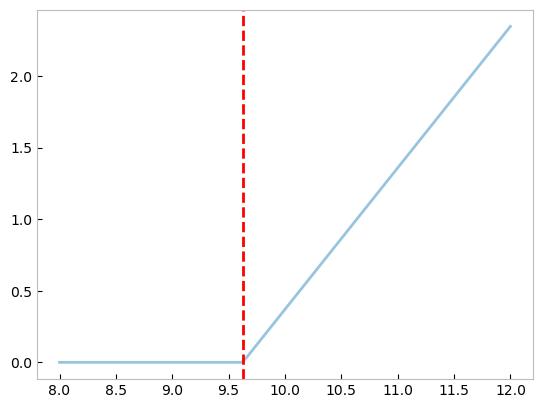

In [136]:
theta = gamma3.end[12]

sigma = theta[2] + theta[3] * (halo_masses - 12)

xinterept = -theta[2]/theta[3] + 12
sigma[sigma < 0] = 0.0
plt.plot(halo_masses, sigma, alpha=0.5)
plt.axvline(xinterept, color="red", ls="--")

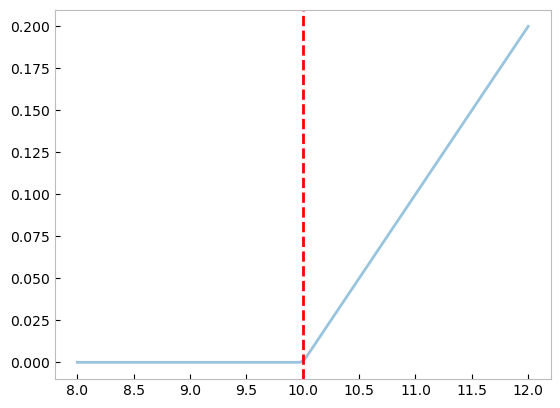

In [141]:
theta = [0,0,0.2,0.1]

sigma = theta[2] + theta[3] * (halo_masses - 12)

xinterept = -theta[2]/theta[3] + 12
sigma[sigma < 0] = 0.0
plt.plot(halo_masses, sigma, alpha=0.5)
plt.axvline(xinterept, color="red", ls="--")

In [109]:
from matplotlib.colors import ListedColormap
from matplotlib.cm import ScalarMappable

In [110]:
mass_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

mass_example = np.vstack(mass_example)
red_example = np.vstack(red_example)

In [111]:
def get_stats(lgMs, min_mass):
    min_mass = min_mass
    stat = jsm_stats.SatStats(lgMs)
    stat.Nsat(min_mass)
    stat.Maxmass()
    return stat

In [112]:
def SHMR_PLOT(theta, model_label=None, mock=None, redshift=False, model_color="cornflowerblue", legend=False, save_file=None):

    stellar_example = jsm_SHMR.general(theta, mass_example, red_example)
    theta_det = theta[:2] + [0, 0] + theta[4:]

    flat_H = mass_example.flatten()
    flat_S = stellar_example.flatten()
    nanmask = ~np.isnan(flat_H)

    fig, ax = plt.subplots(1,3, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1, 1]})

    if model_label!=None:
        ax[0].set_title(model_label, fontsize=15)

    ax[0].axhline(6.5, ls="--", label="magnitude limit", lw=1, color="peru")
    ax[0].set_ylabel("M$_{*}$ [log (M$_\odot$)]", fontsize=15)

    det = jsm_SHMR.general(theta_det, halo_masses, 0)
    ax[0].plot(halo_masses, det, color=model_color)

    sigma = theta[2] + theta[3] * (halo_masses - 12)
    sigma[sigma < 0] = 0.0

    ax[0].fill_between(halo_masses, det - sigma, det + sigma, color=model_color, alpha=0.6)
    ax[0].fill_between(halo_masses, det - 2 * sigma, det + 2 * sigma, color=model_color, alpha=0.4)
    ax[0].fill_between(halo_masses, det - 3 * sigma, det + 3 * sigma, color=model_color, alpha=0.2)

    if mock==True:
        mock_index = np.random.randint(0,10000,100)
        mock_lgMh, mock_lgMs = mass_example[mock_index, :], stellar_example[mock_index, :]
        mass_cut = mock_lgMs > 6.5
        ax[0].scatter(mock_lgMh[mass_cut], mock_lgMs[mass_cut], marker="*", s=9, color="black", label="Mock Survey", zorder=5)
        stat_instance = get_stats(mock_lgMs, 6.5)

        ax[1].plot(np.arange(stat_instance.Pnsat.shape[0]), stat_instance.Pnsat, color="black", zorder=5)
        ax[1].set_ylabel("PDF", fontsize=15)
        ax[1].set_ylim(-0.01,0.4)
        ax[1].set_xlim(-0.1,25)

        ax[2].plot(stat_instance.Msmax, stat_instance.ecdf_MsMax, color="black", zorder=5)
        ax[2].set_ylabel("CDF", fontsize=15)

    ax[0].set_xlabel("log m$_{\mathrm{acc}}$ [M$_\odot$]", fontsize=15)
    ax[0].set_xlim(9.3, 12)
    ax[0].set_ylim(6, 10)

    plt.show()

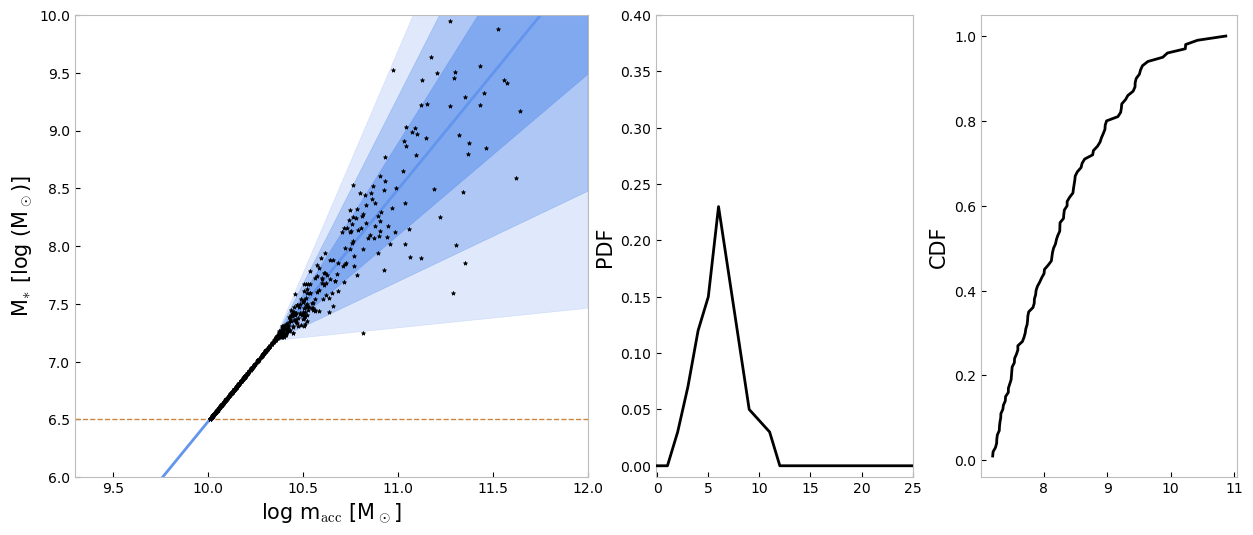

In [113]:
SHMR_PLOT(gamma3.end[96].tolist(), mock=True)

#17, 24, 40, 96